# Task 5. Algorithms on graphs. Introduction to graphs and basic algorithms on graphs

Goal

The use of different representations of graphs and basic algorithms on graphs (Depth-first search and Breadth-first search)


In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

# Task I

I. Generate a random adjacency matrix for a simple undirected unweighted graph with 100 vertices and 200 edges (note that the matrix should be symmetric and contain only 0s and 1s as elements). Transfer the matrix into an adjacency list. Visualize the graph and print several rows of the adjacency matrix and the adjacency list. Which purposes is each representation more convenient for?

In [3]:
# Generate a random adjacency matrix for a simple undirected unweighted graph with 100 vertices and 200 edges 
# (note that the matrix should be symmetric and contain only 0s and 1s as elements)

np.random.seed(4)

def generate_adjacency_matrix(vertices, edges):
    matrix = np.zeros((vertices, vertices), dtype=int)
    added_edges = 0
    
    while added_edges < edges:
        # Randomly select two distinct vertices
        v1, v2 = np.random.choice(vertices, 2, replace=False)
        
        # If there isn't already an edge between them -- add
        if matrix[v1, v2] == 0:
            matrix[v1, v2] = 1
            matrix[v2, v1] = 1 
            added_edges += 1
    
    return matrix

adj_matrix = generate_adjacency_matrix(100, 200)

In [4]:
#Check
adj_matrix.shape

(100, 100)

In [5]:
#Check
np.sum(adj_matrix)
#400 means 200 edges

400

In [6]:
# Transfer the Matrix into an Adjacency List
# The adjacency list is a representation where each vertex is associated with a list of its neighboring vertices.

def matrix_to_adj_list(matrix):
    return {i: list(np.where(row==1)[0]) for i, row in enumerate(matrix)}

adj_list = matrix_to_adj_list(adj_matrix)

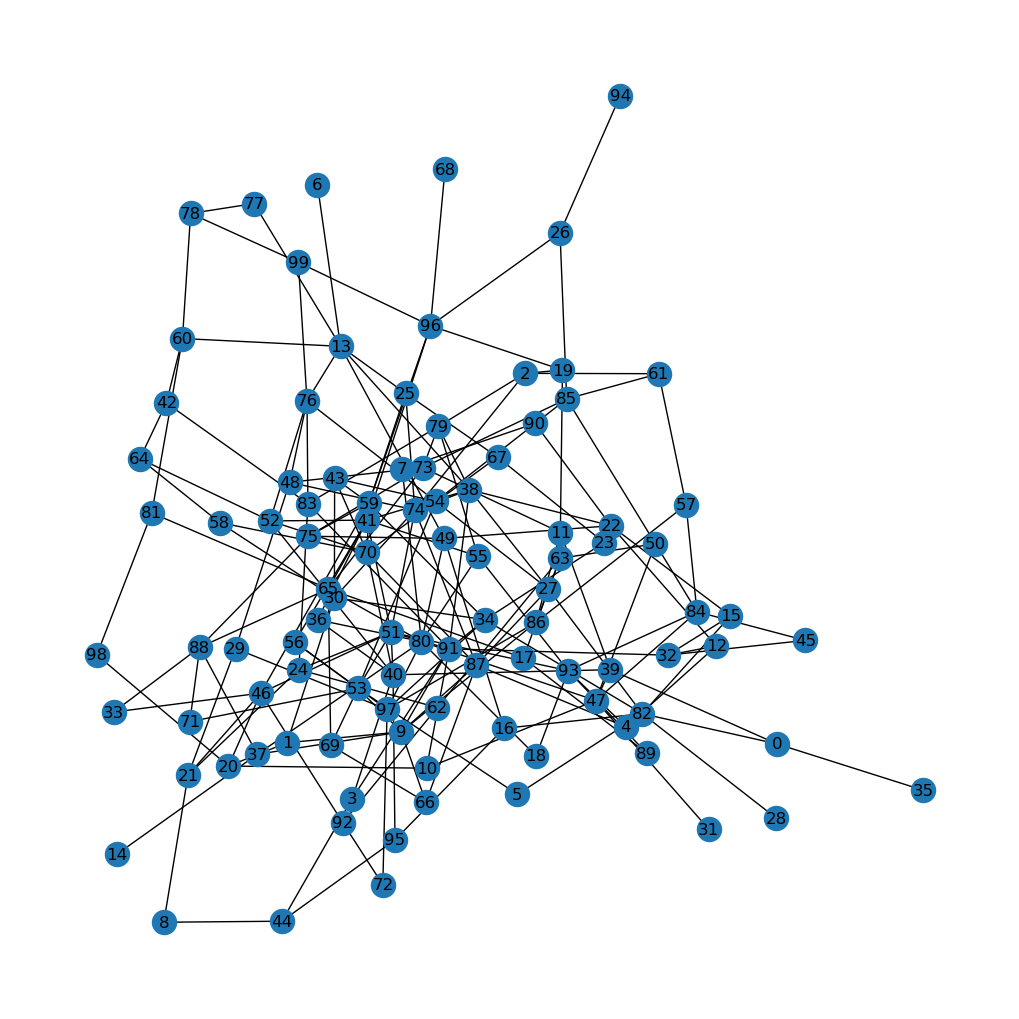

In [7]:
# Visualize the Graph

def visualize_graph(adj_list):
    G = nx.Graph(adj_list)
    plt.figure(figsize=(10, 10))
    nx.draw(G, with_labels=True)
    plt.savefig('part1.png')
    plt.show()

visualize_graph(adj_list)

In [8]:
# Print first 5 rows of the adjacency matrix
print(' --- First 5 adjacency matrix rows ---')
for row in adj_matrix[:5]:
    print(row)

# Print first 5 entries of the adjacency list
print(' ')
print(' --- First 5 adjacency list rows ---')
for key, value in list(adj_list.items())[:5]:
    print(f"{key} --> {value}")

 --- First 5 adjacency matrix rows ---
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

# Task II

Use Depth-first search to find connected components of the graph and Breadth- first search to find a shortest path between two random vertices. 

Analyse the results obtained.

In [9]:
#DFS
def dfs(graph, start, visited):
    visited[start] = True
    component = [start]
    
    for neighbor in graph[start]:
        if not visited[neighbor]:
            component.extend(dfs(graph, neighbor, visited))
    
    return component

def connected_components(graph):
    visited = [False] * len(graph)
    components = []
    
    for vertex in range(len(graph)):
        if not visited[vertex]:
            components.append(dfs(graph, vertex, visited))
    
    return components

In [10]:
# It happens that all vertices are connected, can try diffent np.random.seed()
def analyze_graph(graph):
    components = connected_components(graph)

    components.sort(key=len, reverse=True)

    num_connected = len(components[0]) if components else 0
    num_unconnected = sum(1 for component in components if len(component) == 1)

    print(f"Total number of connected vertices: {num_connected}")
    print(f"Total number of unconnected vertices: {num_unconnected}")
    print(f"Components of the current graph:\n{components}")

analyze_graph(adj_list)


Total number of connected vertices: 100
Total number of unconnected vertices: 0
Components of the current graph:
[[0, 35, 39, 11, 73, 48, 29, 21, 8, 44, 3, 40, 36, 41, 38, 13, 6, 25, 59, 34, 23, 67, 70, 43, 30, 1, 9, 37, 14, 80, 7, 90, 22, 12, 4, 87, 27, 54, 53, 5, 82, 15, 32, 45, 84, 47, 10, 20, 46, 33, 88, 65, 17, 63, 19, 2, 61, 57, 86, 97, 56, 72, 92, 62, 24, 51, 74, 91, 83, 42, 60, 78, 77, 99, 76, 52, 64, 58, 96, 26, 85, 50, 94, 68, 81, 98, 79, 55, 93, 18, 89, 69, 66, 71, 75, 49, 16, 95, 31, 28]]


In [11]:
#BFS
def bfs_shortest_path(graph, start, end):
    visited = [False] * len(graph)
    queue = [(start, [start])]
    
    while queue:
        (vertex, path) = queue.pop(0)
        if vertex == end:
            return path
        
        for neighbor in graph[vertex]:
            if not visited[neighbor]:
                visited[neighbor] = True
                queue.append((neighbor, path + [neighbor]))
                
    return None  # Or no path found

def print_path_and_neighbors(graph, path):
    if not path:
        print("No path found")
        return

    print(f"The founded shortest way is: {path}")
    print("Let's print the founded way from {} to {}".format(path[0], path[-1]))

    for vertex in path[:-1]:
        print(f"{vertex} -> {graph[vertex]}")
    print(f"{path[-1]} -> {graph[path[-1]]}")

In [12]:
# Connected components and shortest path

components = connected_components(adj_list)
print(f"Connected Components: {components}")

# Select two random vertices
print(' ')
v1, v2 = np.random.choice(100, 2, replace=False)
path = bfs_shortest_path(adj_list, v1, v2)
print(f"Random start: {v1}, random end: {v2}")
print_path_and_neighbors(adj_list, path)


Connected Components: [[0, 35, 39, 11, 73, 48, 29, 21, 8, 44, 3, 40, 36, 41, 38, 13, 6, 25, 59, 34, 23, 67, 70, 43, 30, 1, 9, 37, 14, 80, 7, 90, 22, 12, 4, 87, 27, 54, 53, 5, 82, 15, 32, 45, 84, 47, 10, 20, 46, 33, 88, 65, 17, 63, 19, 2, 61, 57, 86, 97, 56, 72, 92, 62, 24, 51, 74, 91, 83, 42, 60, 78, 77, 99, 76, 52, 64, 58, 96, 26, 85, 50, 94, 68, 81, 98, 79, 55, 93, 18, 89, 69, 66, 71, 75, 49, 16, 95, 31, 28]]
 
Random start: 65, random end: 58
The founded shortest way is: [65, 41, 52, 64, 58]
Let's print the founded way from 65 to 58
65 -> [17, 41, 69, 73, 80, 81, 88]
41 -> [36, 38, 51, 52, 55, 56, 65, 96]
52 -> [40, 41, 64, 70, 76]
64 -> [42, 52, 58]
58 -> [30, 64, 70]
